# **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# **Importing Data**

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\heart.csv")

## **About the Dataset:-**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## **Content:-**
Attribute Information:

1) age

2) sex

3) chest pain type (4 values) = 'typical angina' ,'atypical angina','non-anginal pain','asymptomatic'

4) resting blood pressure

5) serum cholestoral in mg/dl

6) fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11) the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## **Displaying Top 5 Rows of the Dataset**

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **Shape of the Dataset**

In [4]:
df.shape
print("Number of rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of rows:  1025
Number of Columns:  14


## **Getting all Information about Our Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **Data Preprocessing**

## **1. Cheking the Null values in the Dataset**

In [6]:
df.isnull().sum().sum()

0

## **2. Checking the Datatypes of Our dataset**

In [7]:
df.select_dtypes('O').sum()

Series([], dtype: float64)

## **3. Cheking Duplicate Data and Drop Them**

In [8]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 723


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(302, 14)

# **Get Overall Statistics About The Dataset**

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Draw Correlation Matrix**

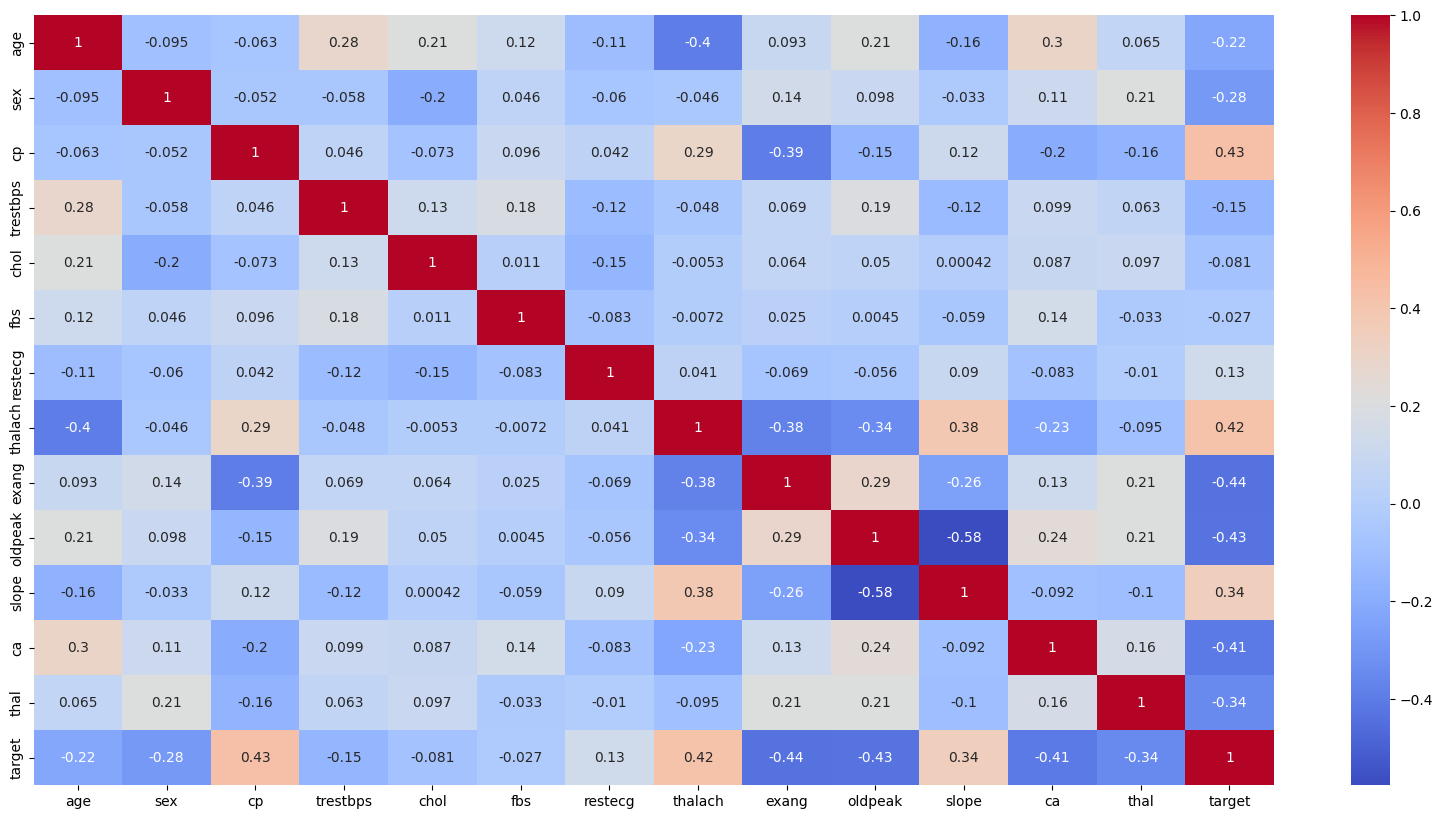

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True , cmap = 'coolwarm')
plt.show()

## **EDA**

## CA According to the Target Column.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\2854131583.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df, x = 'target' , y = 'ca'  , ci = False , palette = 'viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\2854131583.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'target' , y = 'ca'  , ci = False , palette = 'viridis')


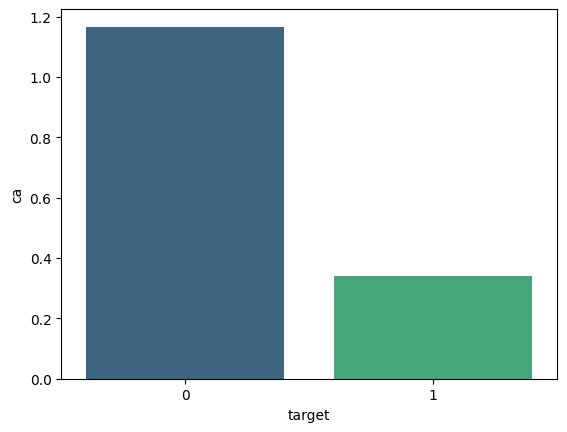

In [13]:
sns.barplot(data = df, x = 'target' , y = 'ca'  , ci = False , palette = 'viridis')
plt.show()

## Oldpeak According to the Target Column.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\2303897705.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df, x = 'target' , y = 'oldpeak'  , ci = False , palette = 'viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\2303897705.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'target' , y = 'oldpeak'  , ci = False , palette = 'viridis')


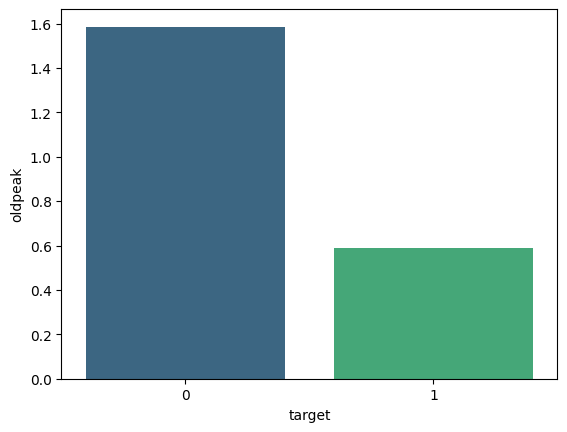

In [14]:
sns.barplot(data = df, x = 'target' , y = 'oldpeak'  , ci = False , palette = 'viridis')
plt.show()

## Exang According to the Target Column.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\872874455.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df, x = 'target' , y = 'exang'  , ci = False , palette = 'viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\872874455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'target' , y = 'exang'  , ci = False , palette = 'viridis')


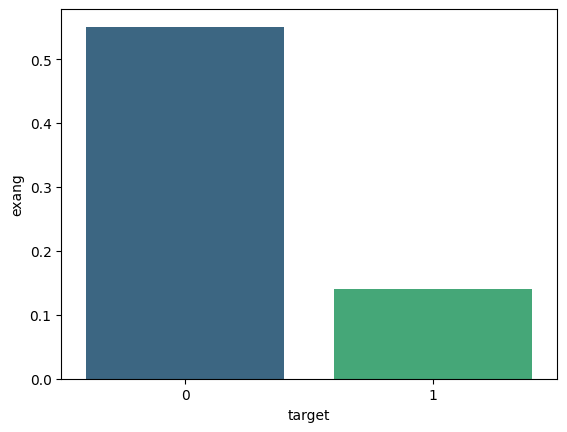

In [15]:
sns.barplot(data = df, x = 'target' , y = 'exang'  , ci = False , palette = 'viridis')
plt.show()

## How many people have heart disease? and how many people don't have heart disease?

In [16]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\4110773364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['target'].value_counts(), palette = 'viridis')


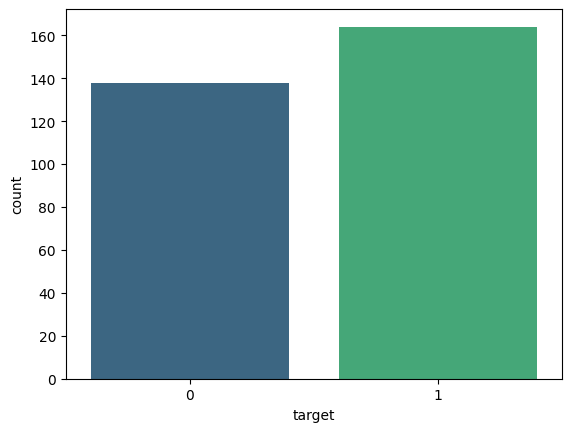

In [17]:
sns.barplot(df['target'].value_counts(), palette = 'viridis')
plt.show()

## Count of [Male and Female].

In [18]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\825576502.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(df['sex'].value_counts() , ci = False , palette = 'viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\825576502.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['sex'].value_counts() , ci = False , palette = 'viridis')


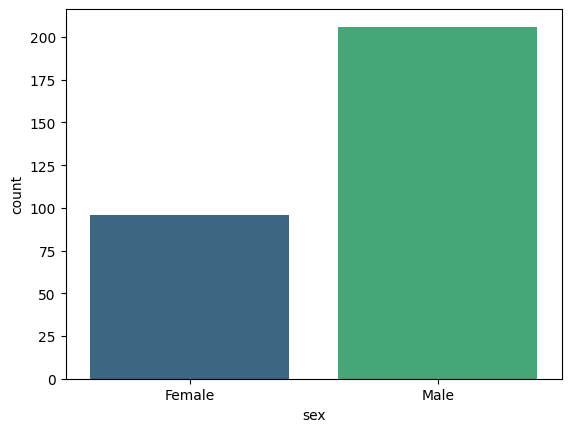

In [19]:
sns.barplot(df['sex'].value_counts() , ci = False , palette = 'viridis')
plt.xticks([0,1],['Female','Male'])
plt.show()

## Gender Distribution According to the Target Variable.

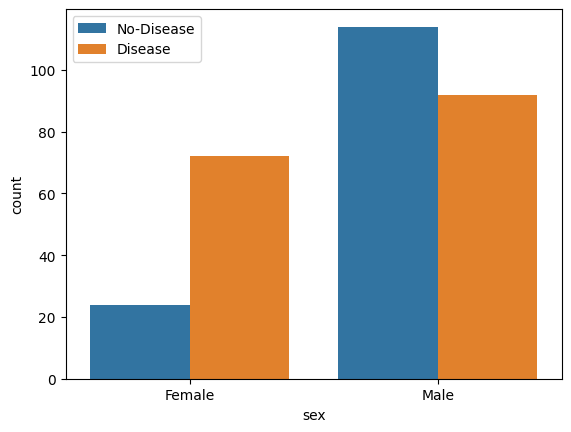

In [20]:
sns.countplot(x = df['sex'] , hue='target', data = df)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

## Age Distribution.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\1867693800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins = 20)


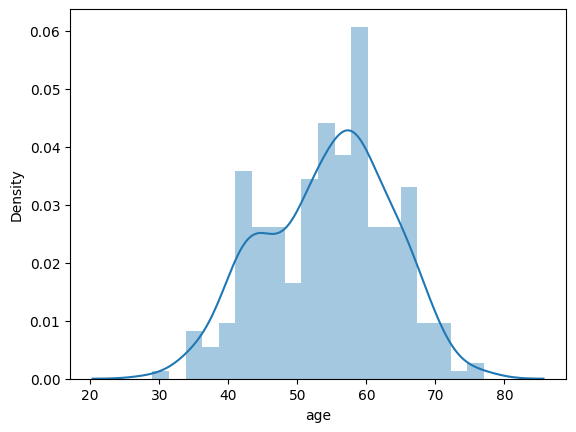

In [21]:
sns.distplot(df['age'], bins = 20)
plt.show()

## Chest Pain Type.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\1269162249.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['cp'].value_counts(), palette = 'viridis')


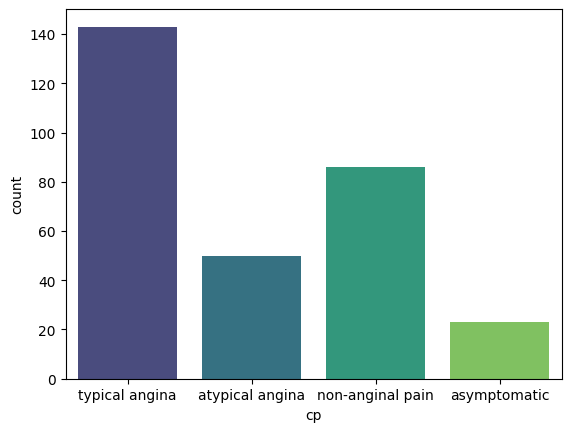

In [22]:
sns.barplot(df['cp'].value_counts(), palette = 'viridis')
plt.xticks([0,1,2,3], ['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.show()

## Chest Pain Distribution as Per Target Variable.

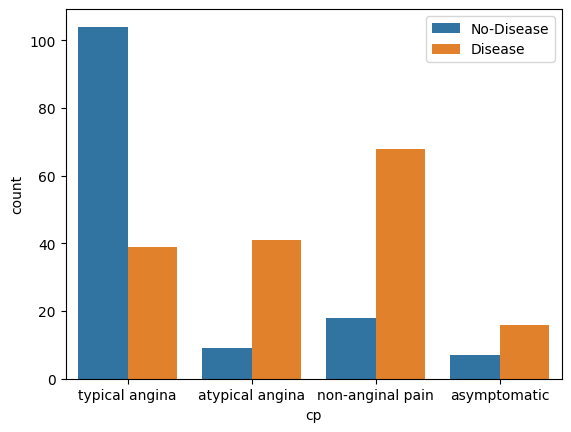

In [23]:
sns.countplot(x = df['cp'] , hue='target', data = df)
plt.xticks([0,1,2,3], ['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

## Fbs Distribution According to Target Variable.

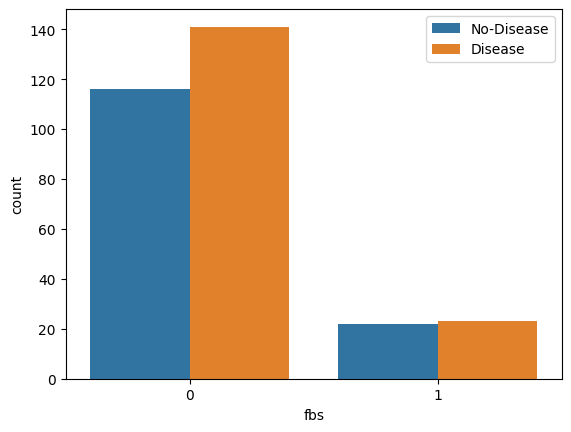

In [24]:
sns.countplot(x = df['fbs'] , hue='target', data = df)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

## Resting BP Distribution.

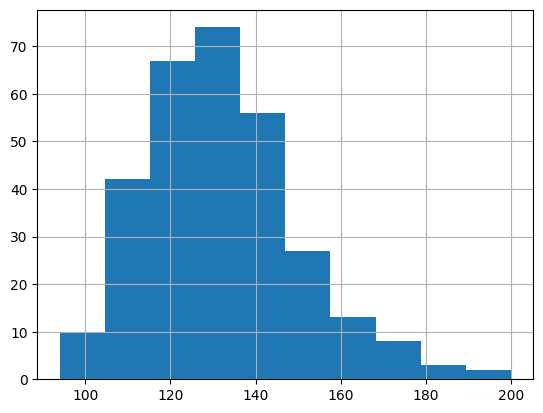

In [25]:
df['trestbps'].hist()
plt.show()

## Resting BP As Per Sex Column.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


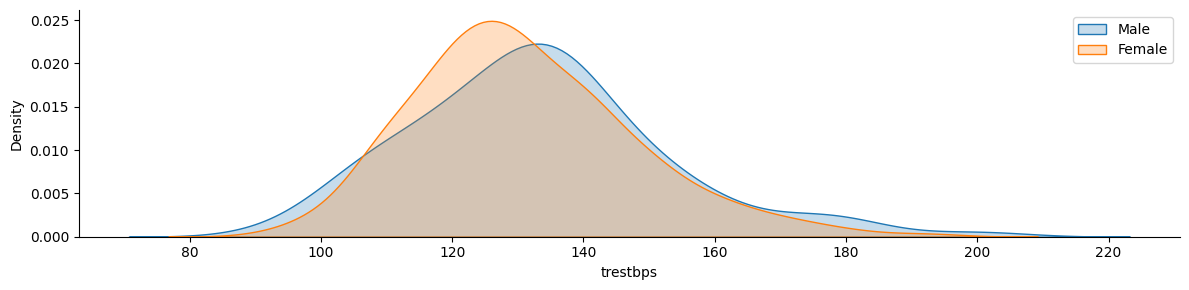

In [26]:
g = sns.FacetGrid(df, hue='sex', aspect=4)
g.map(sns.kdeplot, 'trestbps', shade=True)
plt.legend(labels=['Male','Female'])
plt.show()


## Distribution of Serum Cholesterol

<Axes: >

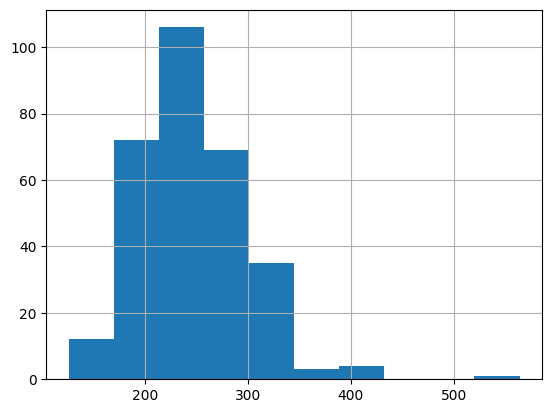

In [27]:
df['chol'].hist() 

## Dividing Data in Categorical Columns and Continuous Columns

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else: 
        cont_val.append(column)    


In [30]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [31]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Plot Continuous Variables

<Figure size 2000x1000 with 0 Axes>

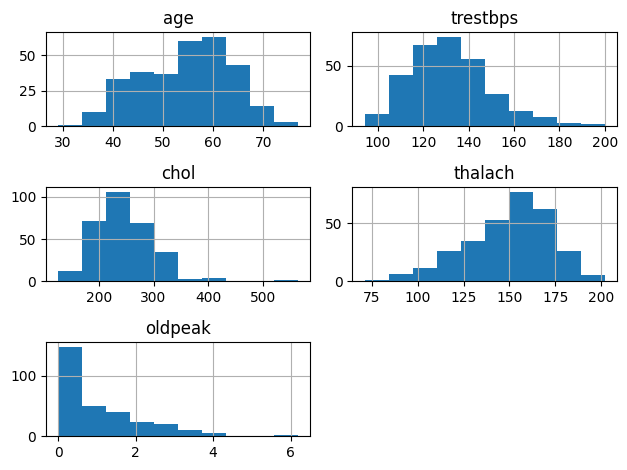

In [32]:
plt.figure(figsize=(20,10))
df.hist(cont_val)
plt.tight_layout()
plt.show()                        

## **Encoding Categorical Data**

In [33]:
df['cp'].unique()  

array([0, 1, 2, 3], dtype=int64)

In [34]:
cate_val.remove('sex')
cate_val.remove('target')
df = pd.get_dummies(df, dtype=int ,columns=cate_val, drop_first=True)
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## **Feature Scaling**

In [35]:
scaler = StandardScaler() 
df[cont_val] = scaler.fit_transform(df[cont_val])
df.head() 

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## **Splitting the Dataset Into The Training and Testing Set**

In [36]:
x = df.drop('target', axis = 1)
y = df['target']

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(241, 22)
(61, 22)
(241,)
(61,)


In [38]:
y_test.head() 

245    1
349    0
135    0
389    1
66     1
Name: target, dtype: int64

In [39]:
y_train.head() 

163    0
291    0
280    1
85     1
239    0
Name: target, dtype: int64

In [40]:
x_test.head() 

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [41]:
x_train.head() 

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


## **Feature Scaling**

In [42]:
# scaler = StandardScaler() 
# x_train_scaled = scaler.fit_transform(x_train)
# x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
# x_train_scaled.head() 

# **Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [44]:
ypred_log = log.predict(x_test) 
ypred_log 

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [45]:
print(classification_report(y_test , ypred_log))
print(confusion_matrix(y_test,ypred_log))
print(accuracy_score(y_test,ypred_log)) 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

[[24  8]
 [ 5 24]]
0.7868852459016393


# **SVM**

In [46]:
from sklearn import svm
svm = svm.SVC()

svm.fit(x_train, y_train)

SVC()

In [47]:
ypred_svm = svm.predict(x_test) 
ypred_svm 

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [48]:
print(classification_report(y_test , ypred_svm))
print(confusion_matrix(y_test,ypred_svm))
print(accuracy_score(y_test,ypred_svm))  

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

[[24  8]
 [ 4 25]]
0.8032786885245902


## **KNeighbors Classifier**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

score = []
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [50]:
knn = KNeighborsClassifier(n_neighbors=2)                        
knn.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=2)

In [51]:
ypred_knn = knn.predict(x_test) 
ypred_knn  

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [52]:
print(classification_report(y_test , ypred_knn))
print(confusion_matrix(y_test,ypred_knn))
print(accuracy_score(y_test,ypred_knn))  

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.81      0.76      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

[[27  5]
 [ 7 22]]
0.8032786885245902


In [53]:
Result1 = pd.DataFrame({'Models':['Logistic Regression','SVM','KNeighbors'],
                        'Accuracy':[accuracy_score(y_test,ypred_log), accuracy_score(y_test,ypred_svm),accuracy_score(y_test,ypred_knn)]})
Result1

,Models,Accuracy
0,Logistic Regression,0.786885
1,SVM,0.803279
2,KNeighbors,0.803279


# **Non-Linear ML Algorithms**

In [54]:
df1 = pd.read_csv(r"C:\Users\Lenovo\Downloads\heart.csv")
df1.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [55]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [56]:
df.drop_duplicates(inplace=True)

In [57]:
df.shape

(302, 23)

In [58]:
x = df1.drop('target', axis=1)
y = df1['target'] 

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(820, 13)
(205, 13)
(820,)
(205,)


## **Decision Tree Classifier**

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2)
dt.fit(x_train , y_train) 

DecisionTreeClassifier(max_depth=7, max_features='log2')

In [62]:
ypred_dt = dt.predict(x_test)
ypred_dt

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [63]:
print(classification_report(y_test , ypred_dt))
print(confusion_matrix(y_test,ypred_dt))
print(accuracy_score(y_test,ypred_dt))  

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       102
           1       0.83      0.93      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205

[[83 19]
 [ 7 96]]
0.8731707317073171


## **Random Forest Classifier**

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_depth= 10, bootstrap= False)
rf.fit(x_train , y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=200)

In [66]:
ypred_rf = rf.predict(x_test)
ypred_rf 

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [67]:
print(classification_report(y_test , ypred_rf))
print(confusion_matrix(y_test,ypred_rf))           
print(accuracy_score(y_test,ypred_rf))  

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]
0.9853658536585366


## **Best Model**

In [68]:
Result2 = pd.DataFrame({'Models':['Decision Tree','Random Forest'],
                        'Accuracy':[accuracy_score(y_test,ypred_dt), accuracy_score(y_test,ypred_rf)]})

Result2

,Models,Accuracy
0,Decision Tree,0.873171
1,Random Forest,0.985366


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\2154078137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Models', data=Result1, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22668\2154078137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Models', data=Result2, palette='viridis')


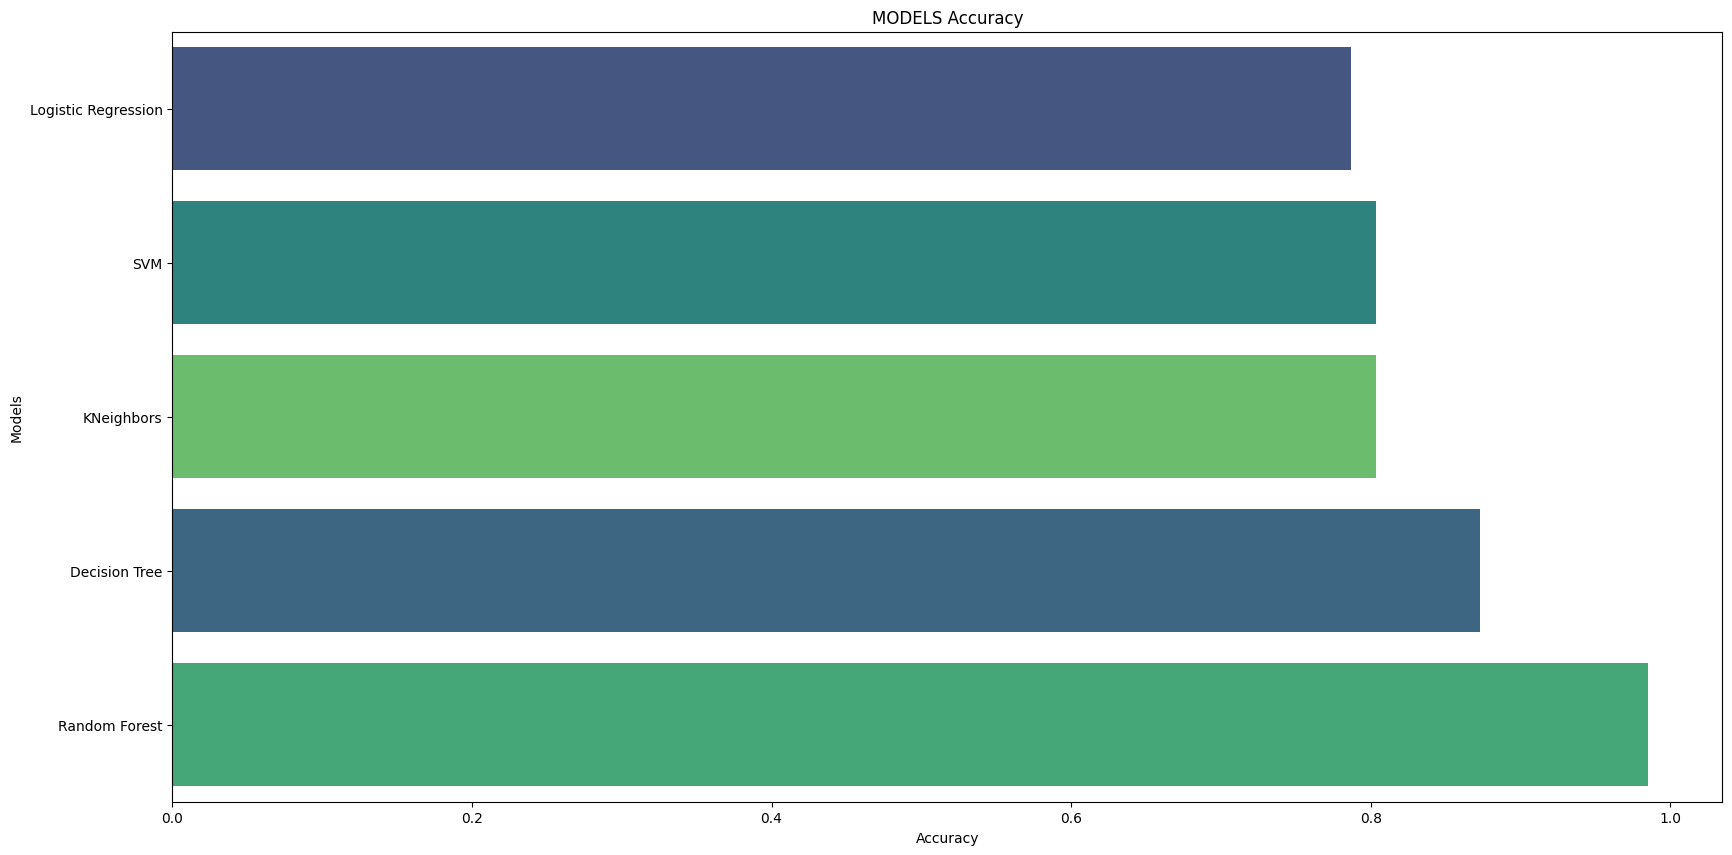

In [69]:
plt.figure(figsize=(20,10))
sns.barplot(x='Accuracy', y='Models', data=Result1, palette='viridis')
sns.barplot(x='Accuracy', y='Models', data=Result2, palette='viridis')
plt.title("MODELS Accuracy")
plt.show() 

## *Inference:- Random Forest is Performing best on this Dataset.* 

## **Training the best model on the entire dataset.**

In [70]:
RF = RandomForestClassifier()
RF.fit(x,y)

RandomForestClassifier()

## **Performing Prediction on the Data.**

In [71]:
x.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [72]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [73]:
new_df = pd.DataFrame({
    'age' : 52,
    'sex':1,
    'cp':0, 
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3},
    index=[0])

In [74]:
p = RF.predict(new_df)
if p[0]==0:
    print('No Disease')
else:
    print('Disease') 

No Disease


## **Save Model Using Joblib**

In [75]:
import joblib

In [76]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [77]:
model = joblib.load('model_joblib_heart')

In [78]:
model.predict(new_df)

array([0], dtype=int64)

## **GUI**

In [79]:
from tkinter import *
import joblib

In [80]:
import tkinter as tk
import joblib

def show_entry_fields():
    # Access entry fields through the entries dictionary
    p1 = int(entries["e1"].get())
    p2 = int(entries["e2"].get())
    p3 = int(entries["e3"].get())
    p4 = int(entries["e4"].get())
    p5 = int(entries["e5"].get())
    p6 = int(entries["e6"].get())
    p7 = int(entries["e7"].get())
    p8 = int(entries["e8"].get())
    p9 = int(entries["e9"].get())
    p10 = float(entries["e10"].get())
    p11 = int(entries["e11"].get())
    p12 = int(entries["e12"].get())
    p13 = int(entries["e13"].get())
    
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
    
    if result == 0:
        result_label.config(text="No Heart Disease")
    else:
        result_label.config(text="Possibility of Heart Disease")

master = tk.Tk()
master.title("Heart Disease Prediction System")

# Create labels and entry fields
tk.Label(master, text="Heart Disease Prediction System", bg="black", fg="white").grid(row=0, columnspan=2)

# Create dictionary to store entry fields
entries = {}

labels = ["Age", "Male Or Female [1/0]", "CP", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
          "oldpeak", "slope", "ca", "thal"]
for i, label_text in enumerate(labels):
    tk.Label(master, text=f"Enter Your {label_text}").grid(row=i + 1)
    entry = tk.Entry(master)
    entry.grid(row=i + 1, column=1)
    # Store reference to entry field in entries dictionary
    entries[f"e{i + 1}"] = entry

# Create predict button
tk.Button(master, text='Predict', command=show_entry_fields).grid(row=len(labels) + 1, columnspan=2)

# Create result label
result_label = tk.Label(master, text="", font=("Helvetica", 12))
result_label.grid(row=len(labels) + 2, columnspan=2)

master.mainloop()
